In [30]:
import sys 
sys.path.append("../")
sys.path.append("../data/")
sys.path.append("../artifacts/")
from load_EEGs_1c import EEGDataset1c
from synthetic_artifacts_1c import SyntheticArtifiacts1c 
import stacklineplot
import torch
import torch.utils.data as data
from constants import *

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

### Real EEGs 

In [39]:
# files_csv = "../data/dataset_csv/sample_file.csv"
# files_csv = TRAIN_NORMAL_FILES_CSV
files_csv = TRAIN_FILES_CSV
dataset = EEGDataset1c(files_csv, max_num_examples=100, length=5000)

#### Single Channel Graph

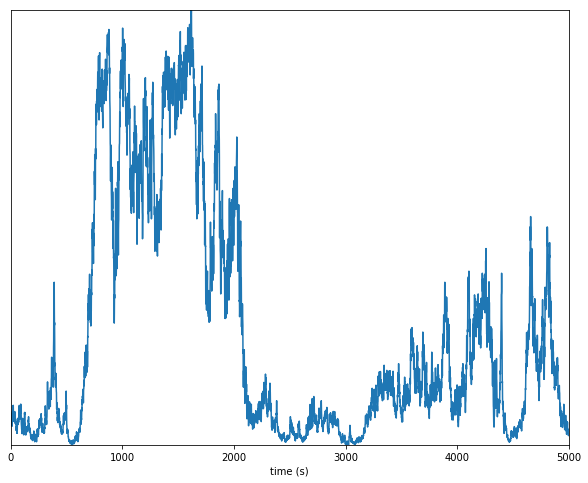

In [32]:
sample = dataset[2]
sample = sample.numpy()
stacklineplot.stackplot(sample)

#### Batch Graph

In [40]:
samples_data_loader = data.DataLoader(dataset=dataset,
                                  shuffle=True,
                                  batch_size=16)
samples_data_loader = iter(samples_data_loader)

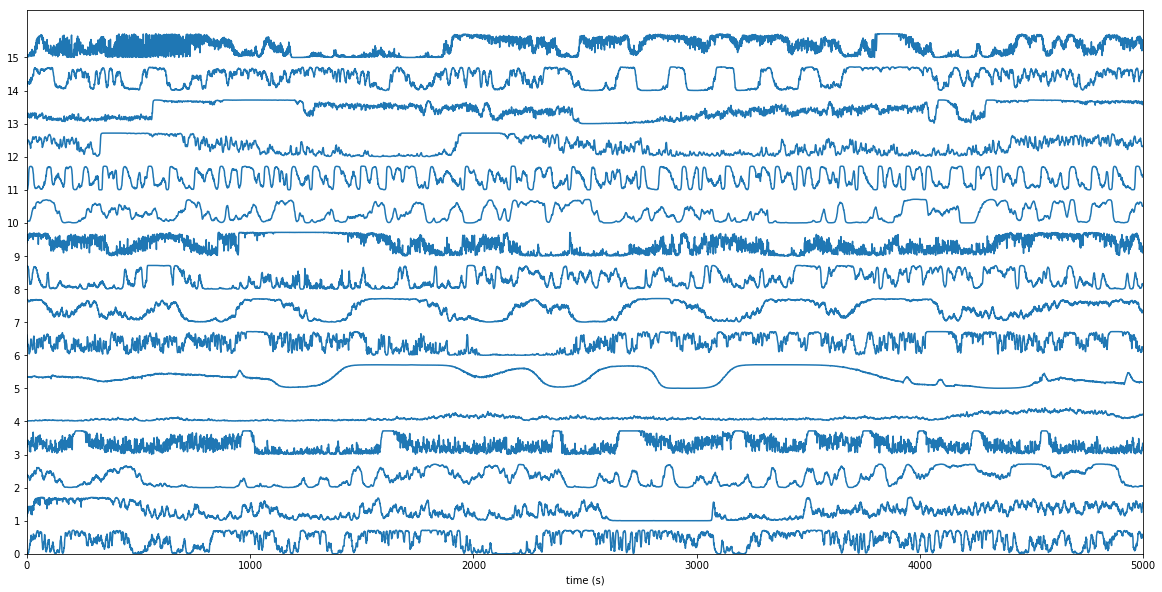

In [41]:
sample_batch = next(samples_data_loader)
sample_batch = sample_batch.view(sample_batch.shape[0], sample_batch.shape[2])#.numpy()
stacklineplot.stackplot(sample_batch, yscale=.5)

In [14]:
print(torch.abs(sample_batch[1]).mean())
min(sample_batch[0])

tensor(0.4328)


tensor(0.0010)

### Artifacts

Some 60hz noise

In [24]:
artifacts_dataset = SyntheticArtifiacts1c(16*10, length=5000)

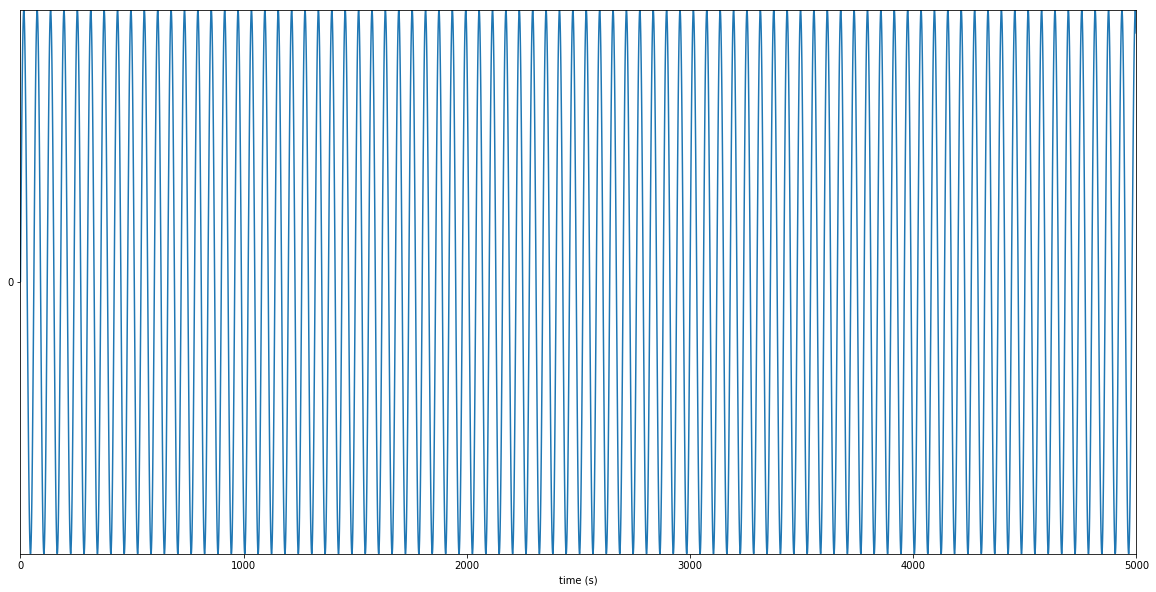

In [25]:
artifact = artifacts_dataset[0]
artifact = artifact.numpy().T
stacklineplot.stackplot(artifact)

In [27]:
artifacts_data_loader = data.DataLoader(dataset=artifacts_dataset,
                                  shuffle=True,
                                  batch_size=16)
artifacts_data_loader = iter(artifacts_data_loader)

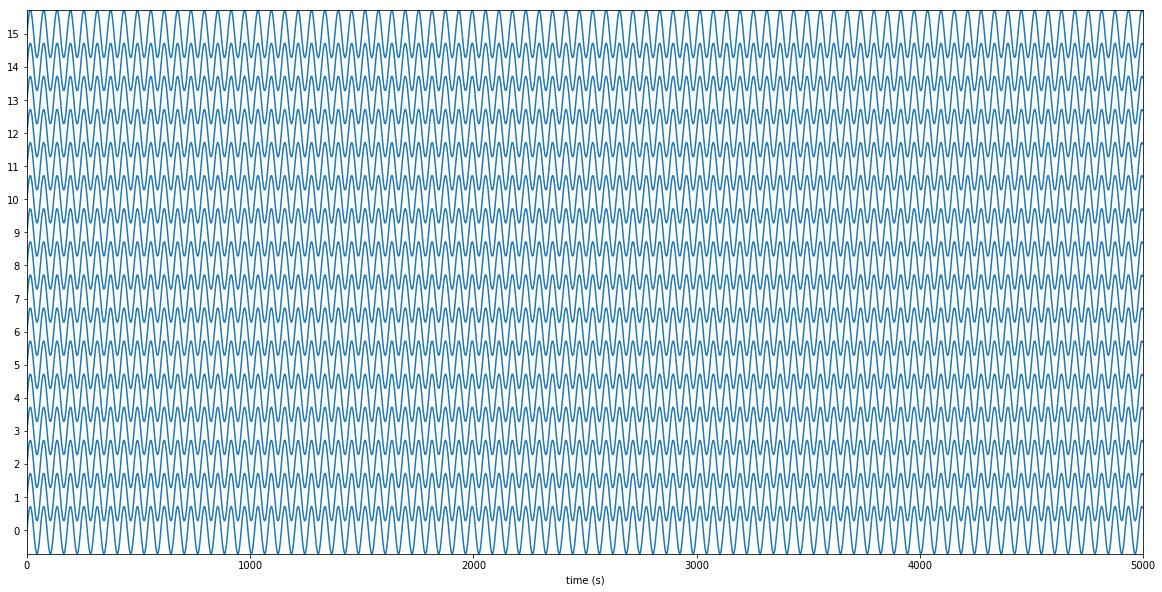

In [18]:
artifact_batch = next(artifacts_data_loader)
artifact_batch = artifact_batch.view(artifact_batch.shape[0], artifact_batch.shape[1]).numpy()
stacklineplot.stackplot(artifact_batch)

### Artifiacts Superimposed on EEGs

In [37]:
artifact_batch = next(artifacts_data_loader)
artifact_batch = artifact_batch.view(artifact_batch.shape[0], artifact_batch.shape[1]).numpy()
sample_batch = next(samples_data_loader)
sample_batch = sample_batch.view(sample_batch.shape[0], sample_batch.shape[1]).numpy()

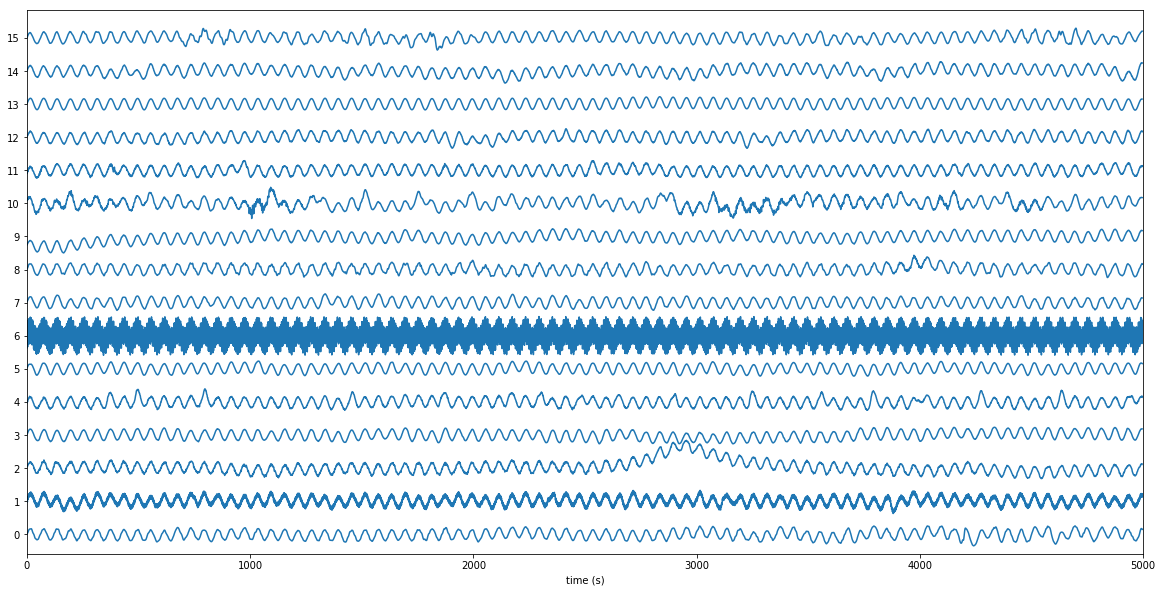

In [38]:
a = 1e3
stacklineplot.stackplot(artifact_batch * a  + sample_batch)

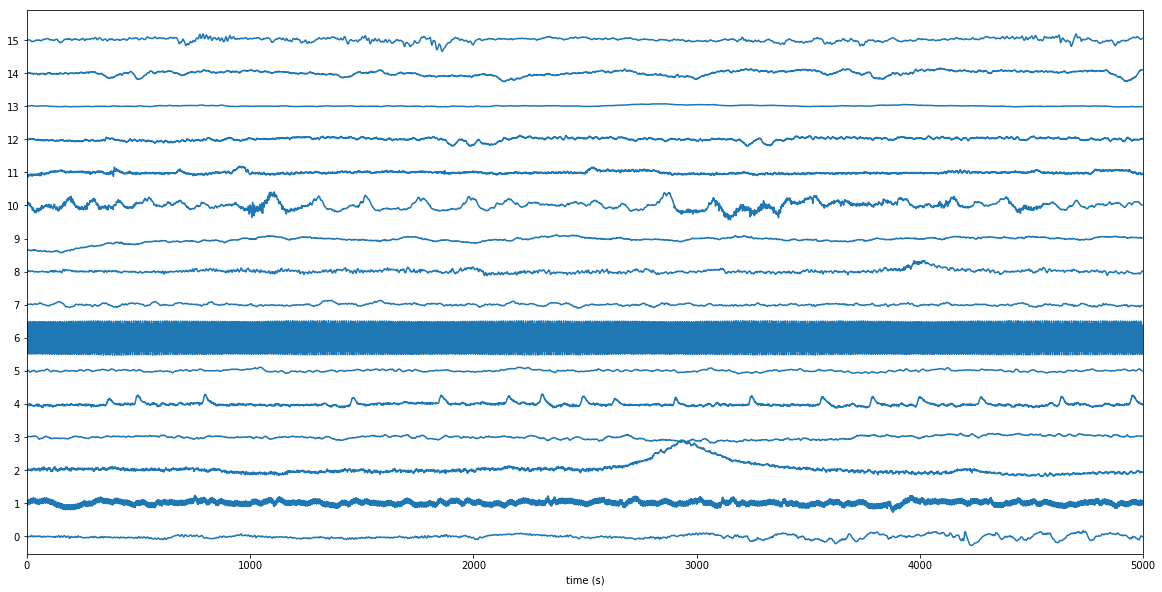

In [39]:
stacklineplot.stackplot(sample_batch)

### Visuals with Bokeh 

In [16]:
print("sample batch", sample_batch.shape)

sample batch torch.Size([16, 5000])


In [18]:
import eegvis
import eegvis.stacklineplot
import eegvis.stackplot_bokeh as splotb
import eegvis.nb_eegview as nb_eegview
import edflib  # pyedf is also an option
from bokeh.io import output_notebook, push_notebook
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
output_notebook()

Loading BokehJS ...

In [26]:
sample_batch = sample_batch.numpy()

In [27]:
ylabels = [str(i) for i in range(sample_batch.shape[0])]
fig=splotb.show_epoch_centered(sample_batch, 20, epoch_width_sec=10, chstart=0, chstop=19, fs=200, ylabels=ylabels)

In [28]:
from bokeh.plotting import show
show(fig)

In [ ]:
# eegplot = nb_eegview.EeghdfBrowser(eeghdf_file=hf, montage='neonatal', yscale=3.0)
# eegplot.loc_sec = 50
# eegplot.show()